Name: Berkay Doruk
Album Number: 409437
Lab: Second

# 1. INTRODUCTION (Narrative Explanation)

This section is an introduction for the one-dimensional diffusion equation from Lecture 1, slide 13. It shows how a pollutant or chemical spreads over time and space. Equation is written like the below:

$$
\frac{\partial c}{\partial t} = D \frac{\partial^2 c}{\partial x^2},
$$

where:

- $c(x, t)$: Concentration dependent on time and space ($\mathrm{mol/m^3}$). Concentration is for density of a substance in a given volume. The unit here is cubic meters per mole for this reason.
- $D$: Diffusion coefficient ($\mathrm{m^2/s}$). The diffusion coefficient tells how quickly a substance diffuses on time.

If at $t=0$, all mass “M” is concentrated at $x=0$, the solution becomes a Gaussian distribution:

$$
c(x, t) = \frac{M}{\sqrt{4 \pi D t}} \exp\left(-\frac{x^2}{4 D t}\right).
$$

This formula is telling us that if time increases, the peak of the Gaussian gets lower and wider, but the total mass stays the same.

**Unit System and Axes:**
- The **x‑axis represents time** in seconds.
- A few fixed positions in meters are chosen to see how the concentration changes with time.
- Concentration is measured in $\mathrm{mol/m^3}$.
- Diffusion coefficient $D$ is in $\mathrm{m^2/s}$.
- Total mass $M$ is in $\mathrm{mol}$.

In this work, we use the Pint library for handling units and Matplotlib for plotting, matching the units on the graph as the lecture's description.

## 2. IMPORTING LIBRARIES 

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pint

si = pint.UnitRegistry()

## 3. DEFINING PARAMETERS 

The following parameters were chosen:

- **Diffusion Coefficient ($D$)**: $1.0 \, \mathrm{m^2/s}$  
**Total Mass ($M$)**: Adjusted to $\sqrt{4 \pi}$ moles so that the peak value at $t = 1 \, \mathrm{s}$ equals $1.0 \, \mathrm{mol/m^3}$
- **Positions ($\text{pos}$)**: 6 positions where the concentration will be shown: $0 , \mathrm{m}$, $1 , \mathrm{m}$, $2 , \mathrm{m}$, $4 , \mathrm{m}$, and $6 , \mathrm{m}$.
- **Time Range ($t$)**: From $0.01 \, \mathrm{s}$ to $7 \, \mathrm{s}$

In [48]:
# Params
D = 1.0 * si.meter**2 / si.second
M = (np.sqrt(4 * np.pi)) * si.mole

pos = [0, 1, 2, 4, 6]
pos = [p * si.meter for p in pos]

t = np.linspace(0.01, 7, 500) * si.second # To avoid RuntimeWarning: divide by zero encountered in divide in GRAPH 0 --> 0.001

**Why the Time Range (0.01–7 s) Was Selected:** 

First of all when time is **0** the equation becomes undefined. That is the resason why time starts from "0.01". And the reason times limit set between 0.01s and 7s is it will allow us to see changes at the beginning. The limit of 7 second could be enough for it.


## 4. DEFINING THE ANALYTICAL SOLUTION FUNCTION

The Gaussian solution of the diffusion equation is defined here:

$$
c(x, t) = \frac{M}{\sqrt{4 \pi D t}} \exp\left(-\frac{x^2}{4 D t}\right).
$$

We will use the **Pint** library to manage units correctly.


In [49]:
def concentration(x, t):
    # M, D, t -> Computed while preserving Pint units
    c_val = (M / ((4 * np.pi * D * t) ** 0.5)) * np.exp(-x**2 / (4 * D * t)) # c(x,t)
    return c_val

## 5. GRAPH

- The concentration $ c(x,t) $ is calculated for a fixed position and varying time (from 0.01 s to 7 s).  
- Curves are plotted for several fixed positions (0m, 1m, 2m, 4m, 6m).  
- The **x‑axis now represents time** (with units automatically added using **Pint**) and the y‑axis represents concentration.  
- A vector-format PDF output with my name on the graph.

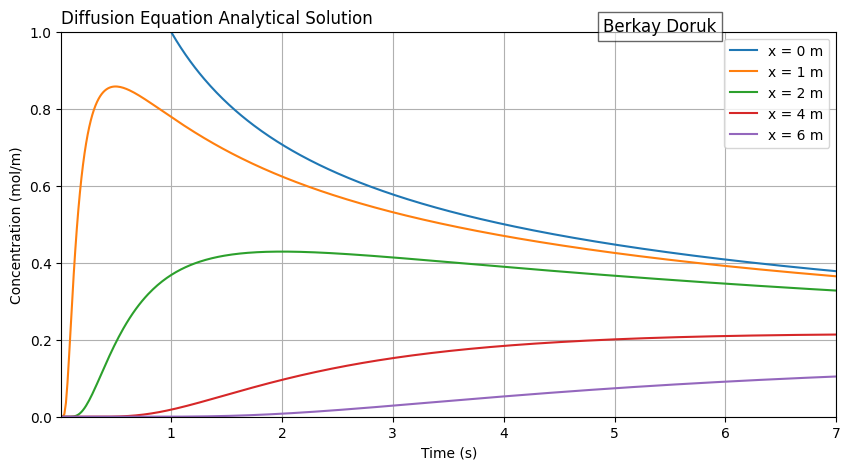

In [50]:
plt.figure(figsize=(10, 5))

# Times
for x_val in pos:
    c = concentration(x_val, t).to('mol/m')  # Concentration as in "mol/m"
    plt.plot(t.magnitude, c.magnitude, label=f"x = {x_val:~P}")

# Add Pint units to the labes
plt.xlabel(f"Time ({t.units:~P})")
plt.ylabel(f"Concentration ({c.units:~P})")

# Graph limits
plt.xlim(t.magnitude[0], t.magnitude[-1])
plt.ylim(0, 1)  # Adding spaces

plt.title("Diffusion Equation Analytical Solution", loc='left')
plt.grid(True)
plt.legend()

plt.text(t.magnitude[-1]*0.7, 1.0, 'Berkay Doruk', fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

plt.savefig("diffusion_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()


# GRAPH EXPLANIATION

- The graph shows how concentration changes over time and space.

- **$x = 0 \mathrm{m}$**: The concentration is high and it is around $0.8 \, \mathrm{mol/m^3}$ and decreases as going away from the source.

- **$x = 1, 2, 4, 6 \mathrm{m}$**: For short times (not even 1 second), the concentration rises while the diffusion wave reaches these points. Each position has a different peak point, showing that the wave takes longer to reach longer distances.

- For longer times (more than 2 seconds), the lines weakening through zero as the system becomes more homogeneous.



# CONCLUSION

This Jupyter Notebook shows the classical gaussian solution to the one-dimensional diffusion equation using units with the Pint library and graph showing with Matplotlib. In the codes, the x‑axis represents time (from 0s to 6s), and concentration on $ c(x,t) $ are plotted for different positions (0m, 1m, 2m, 4m, 6m).